In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as P
from scipy import stats

import textwrap

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.metrics import r2_score
import walnut_utils as wnut
from importlib import reload

In [2]:
iniN = 3
endN = 48

src = '../hpcc/traditional/'
dst = src + 'results/'

filename = src + 'traditional_phenotype_summary.csv'
df = pd.read_csv(filename, dtype={1:str})
print(df.shape)
df = df.drop(index = df[df['PercentKernel'] == -1].index)
df['TipShrivel'] /= 100
df['MinorShrivel'] /= 100
df['MajorShrivel'] /= 100
df['PercentKernel'] /= 100

print(df.shape)

filename = src + 'col_labels.csv'
labels = pd.read_csv(filename, dtype=str, keep_default_na = False)
print(labels.shape)

cattraitnames = df.columns[endN:].values[[12,4,1,3,7,6,11,0,2]]

marker = ['o', 'v','*','^', 's', '<', 'X', '>', 'p', '8', 'h', 'H', 'D', 'd', 'P']
#col_wong = ['#e69f00', '#009e73', '#0072b2', '#d55e00', '#cc79a7', '#f0e442', '#56b4e9']
col_wong = ['#d81b60', '#1e88e5', '#ffc107', '#004d40', '#56e495']
col_wong += col_wong

pqual = np.asarray([0,1,2,3,4,6,7,8,11,12])
pquant = np.asarray([5,8,9,10,13])

(1264, 63)
(1237, 63)
(63, 2)


In [3]:
himalaya = 'NewStuke_R1_T18'
interest = df[df.bname == himalaya]
other = df[df.bname != himalaya]

In [4]:
for i in range(len(df.columns)):
    print(i,df.columns[i], labels.col_labels[i], labels.col_units[i], sep='\t')

0	UCACCSD	UCACCSD	
1	bname	Batch Name	
2	wname	Scan Name	
3	nut_length	Nut Length	 [mm]
4	nut_height	Nut Height	 [mm]
5	nut_width	Nut Width	 [mm]
6	nut_vol	Nut Volume	 [mm$^3$]
7	nut_va3d	Nut VA3D	
8	nut_ratio_feret	Nut Feret Ratio	
9	nut_area	Nut Surface Area	 [mm$^2$]
10	nut_sphericity	Nut Sphericity	
11	nut_cnvx_area	Nut Convex Surface Area	 [mm$^2$]
12	nut_cnvx_vol	Nut Convex Volume	 [mm$^3$]
13	nut_ratio_cnvx_area	Nut Ratio Convex Area	 [%]
14	nut_inv_ratio_cnvx_vol	Nut Ratio Convex Volume	 [%]
15	krumbein	Krumbein Index	
16	sneed	Sneed Index	
17	air_vol	Air Volume	 [mm$^3$]
18	meat_vol	Kernel Volume	 [mm$^3$]
19	shell_vol	Shell Volume	 [mm$^3$]
20	vein_vol	Packing Volume	 [mm$^3$]
21	air_ratio_vol	Air Vol Ratio	 [%]
22	meat_ratio_vol	Kernel Vol Ratio	 [%]
23	shell_ratio_vol	Shell Vol Ratio	 [%]
24	vein_ratio_vol	Packing Vol Ratio	 [%]
25	shell_rugosity	Shell Rugosity	
26	shell_thickness	Shell Thickness	 [mm]
27	shell_prot_ratio	Protruding Shell Vol Ratio	 [%]
28	shell_prot_vol	Pr

In [5]:
offset = 3

qtraits = np.arange(offset,48)
ptraits = np.arange(48, len(df.columns) - 1)

kcorrstat = np.ones((len(qtraits), len(ptraits)))
kpvalcorr = np.zeros_like(kcorrstat)

scorrstat = np.ones_like(kcorrstat)
spvalcorr = np.zeros_like(kcorrstat)

feats = df.iloc[:, offset:62].values.copy()

for i in range(len(qtraits)):
    for j in range(len(ptraits)):
        kstat, kpval = stats.kendalltau(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        sstat, spval = stats.spearmanr(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        
        kcorrstat[i,j] = kstat
        kpvalcorr[i,j] = kpval
        
        scorrstat[i,j] = sstat
        spvalcorr[i,j] = spval

In [6]:
for i in range(len(ptraits)):
    foo = np.sort(pd.unique(df.iloc[:, ptraits[i]]))
    print(i, labels.col_labels[ptraits[i]], len(foo), foo, sep='\t')

0	Shell Integrity	4	[4. 5. 6. 7.]
1	Shell Texture	5	[3. 4. 5. 6. 7.]
2	Shell Color	5	[3. 4. 5. 6. 7.]
3	Seal	4	[3. 4. 5. 6.]
4	Shell Strength	6	[3. 4. 5. 6. 7. 8.]
5	Shell Thickness	11	[0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8 2. ]
6	Packing Tissue	5	[4. 5. 6. 7. 8.]
7	Kernel Fill	6	[3. 4. 5. 6. 7. 8.]
8	Tip Shrivel	15	[0.         0.1        0.11111111 0.125      0.2        0.22222222
 0.3        0.33333333 0.4        0.5        0.6        0.66666667
 0.7        0.77777778 0.8       ]
9	Minor Shrivel	8	[0.         0.1        0.11111111 0.125      0.2        0.25
 0.3        0.33333333]
10	Major Shrivel	6	[0.         0.1        0.11111111 0.16666667 0.22222222 0.3       ]
11	Plumpness	5	[3. 4. 5. 6. 7.]
12	Ease Of Removal	6	[3. 4. 5. 6. 7. 8.]
13	Percent Kernel	167	[0.29204899 0.36682406 0.42225106 0.42314503 0.42733813 0.4317474
 0.43903799 0.44038654 0.44817374 0.45032736 0.46393972 0.46424075
 0.46488764 0.46573308 0.46960528 0.47118328 0.48389312 0.49164054
 0.492055   0.49405286 0.4

In [8]:
corr = np.zeros_like(scorrstat)
corr[:, pquant] = scorrstat[:, pquant]
corr[:, pqual]  = kcorrstat[:, pqual]

In [19]:
np.argsort(np.abs(corr[:, 13]))[::-1]

array([23, 20, 16, 41, 25, 22,  4,  7, 10, 18, 24, 43, 11,  0,  5, 12, 13,
       19, 44, 36, 42,  6, 38,  8, 32,  9, 17,  3, 28, 14, 26,  2, 33,  1,
       29, 27, 21, 30, 40, 15, 31, 37, 39, 35, 34])

In [43]:
fs = 22
for yidx in ptraits:
    fig, ax = plt.subplots(2,4,figsize=(20,9), sharey=True)
    ax = np.atleast_1d(ax).ravel()

    y = df.iloc[:, yidx].values

    ax[0].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs);
    ax[4].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs);

    for i,xidx in enumerate(np.argsort(np.abs(corr[:, yidx-len(qtraits)-offset]))[::-1][:len(ax)] + offset):
        x = df.iloc[:, xidx].values

        xrange = np.linspace(np.min(x)-0.1, np.max(x)+0.1, 100)

        s = corr[xidx - offset, yidx - len(qtraits) - offset]
        ax[i].scatter(x,y, c='b', alpha=0.25, s=75)
        #ax[i].set_aspect('equal', 'datalim')
        ax[i].tick_params(labelsize=fs-2)

        ax[i].set_xlabel(labels.col_labels[xidx] + labels.col_units[xidx], fontsize=fs);

        new_series = P.Polynomial.fit(x,y, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(y, new_series(x))
        axlabel = 'R$^2$ = {:.2}\ns   = {:.2}'.format(r2,s)
        ax[i].plot(xrange, new_series(xrange), color='r', label=axlabel, ls='-.', lw=3)
        #ax.plot(xrange, xrange, color='k', label=axlabel, ls='-.', lw=3)

        ax[i].legend(loc='lower right', fontsize=fs)

    fig.tight_layout()
    print(filename)
    filename = dst + 'highest_corrs_' + labels.col_labels[yidx].replace(' ', '_').lower() + '_2x4'
    plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
    plt.close()

../hpcc/traditional/results/highest_corrs_percent_kernel_2x4
../hpcc/traditional/results/highest_corrs_shell_integrity_2x4
../hpcc/traditional/results/highest_corrs_shell_texture_2x4
../hpcc/traditional/results/highest_corrs_shell_color_2x4
../hpcc/traditional/results/highest_corrs_seal_2x4
../hpcc/traditional/results/highest_corrs_shell_strength_2x4
../hpcc/traditional/results/highest_corrs_shell_thickness_2x4
../hpcc/traditional/results/highest_corrs_packing_tissue_2x4
../hpcc/traditional/results/highest_corrs_kernel_fill_2x4
../hpcc/traditional/results/highest_corrs_tip_shrivel_2x4
../hpcc/traditional/results/highest_corrs_minor_shrivel_2x4
../hpcc/traditional/results/highest_corrs_major_shrivel_2x4
../hpcc/traditional/results/highest_corrs_plumpness_2x4
../hpcc/traditional/results/highest_corrs_ease_of_removal_2x4


../hpcc/traditional/results/highest_corrs_percent_kernel_2x4
../hpcc/traditional/results/highest_corrs_shell_integrity_1x5
../hpcc/traditional/results/highest_corrs_shell_texture_1x5
../hpcc/traditional/results/highest_corrs_shell_color_1x5
../hpcc/traditional/results/highest_corrs_seal_1x5
../hpcc/traditional/results/highest_corrs_shell_strength_1x5
../hpcc/traditional/results/highest_corrs_shell_thickness_1x5
../hpcc/traditional/results/highest_corrs_packing_tissue_1x5
../hpcc/traditional/results/highest_corrs_kernel_fill_1x5
../hpcc/traditional/results/highest_corrs_tip_shrivel_1x5
../hpcc/traditional/results/highest_corrs_minor_shrivel_1x5
../hpcc/traditional/results/highest_corrs_major_shrivel_1x5
../hpcc/traditional/results/highest_corrs_plumpness_1x5
../hpcc/traditional/results/highest_corrs_ease_of_removal_1x5


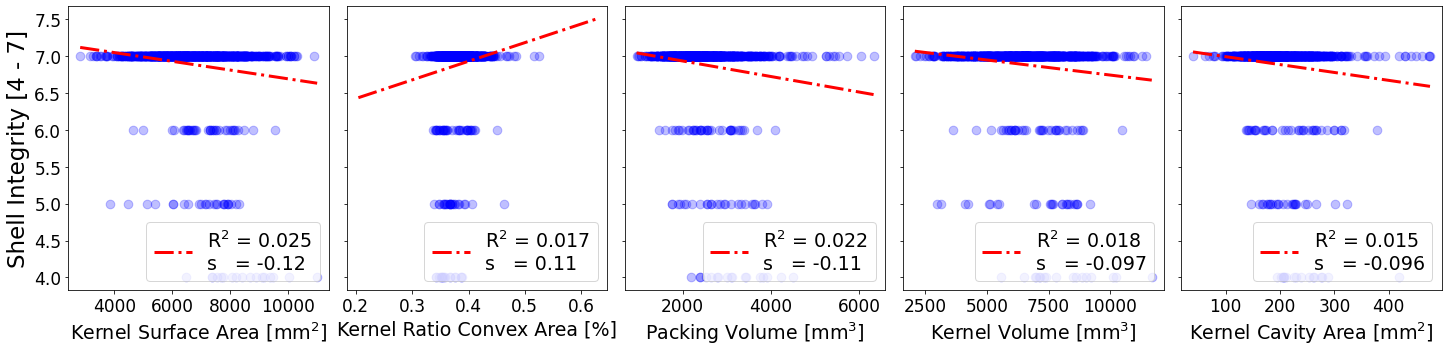

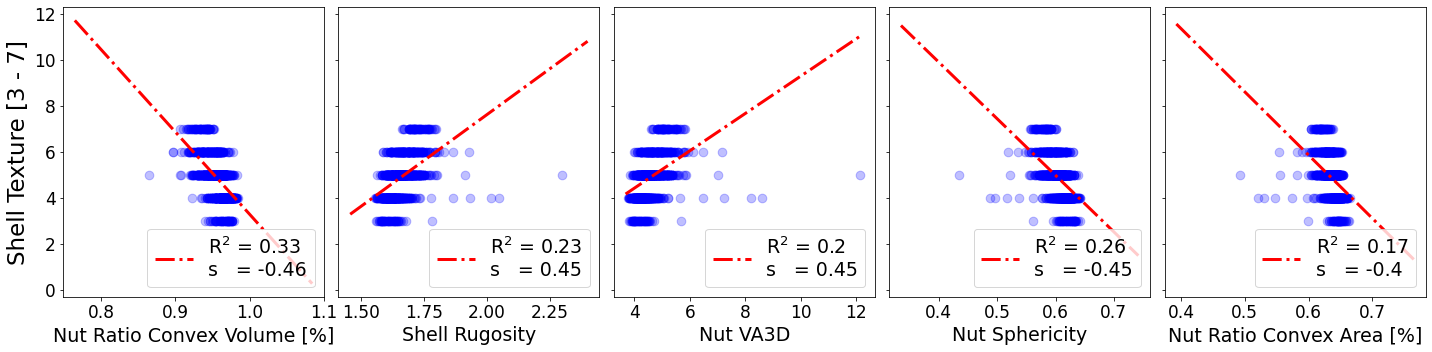

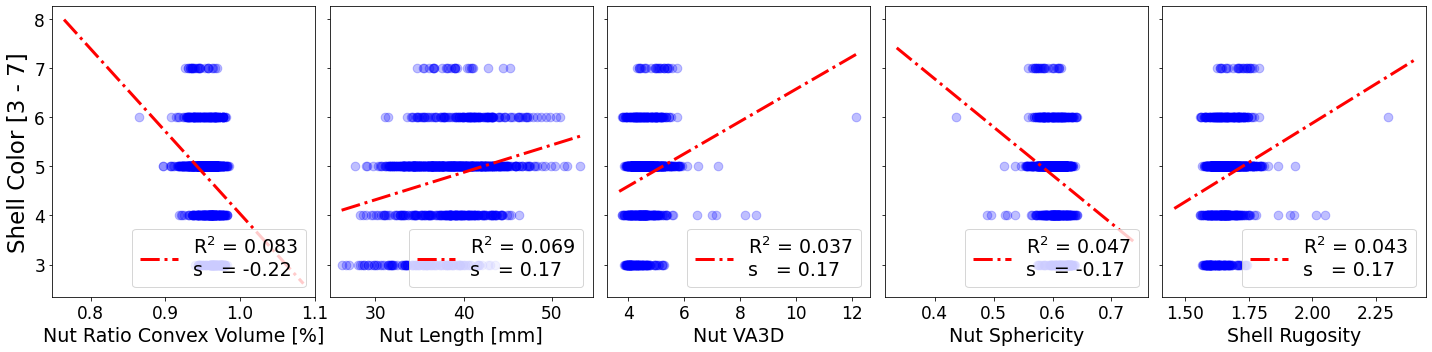

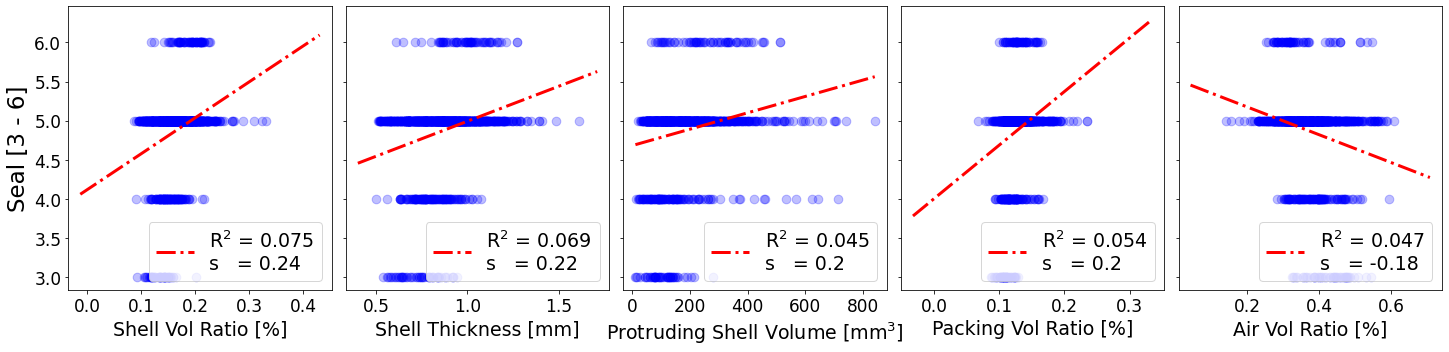

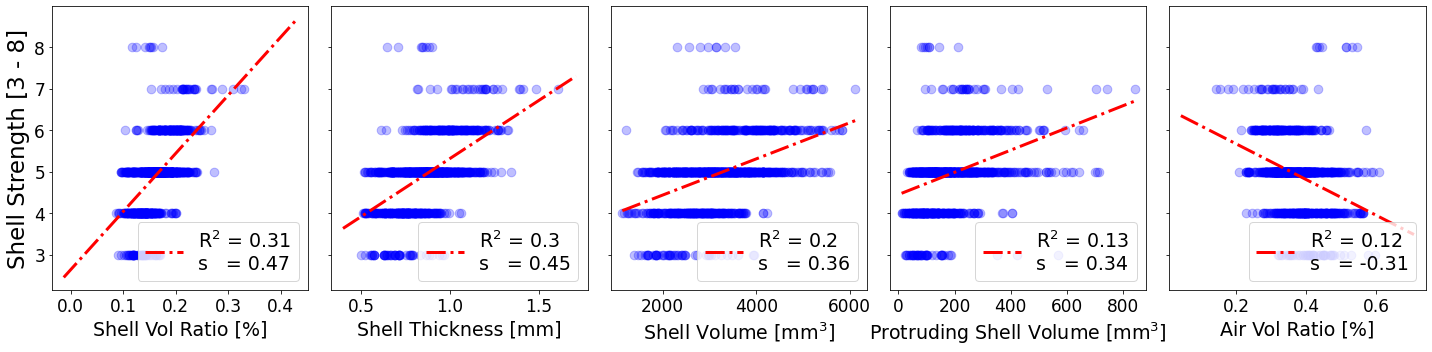

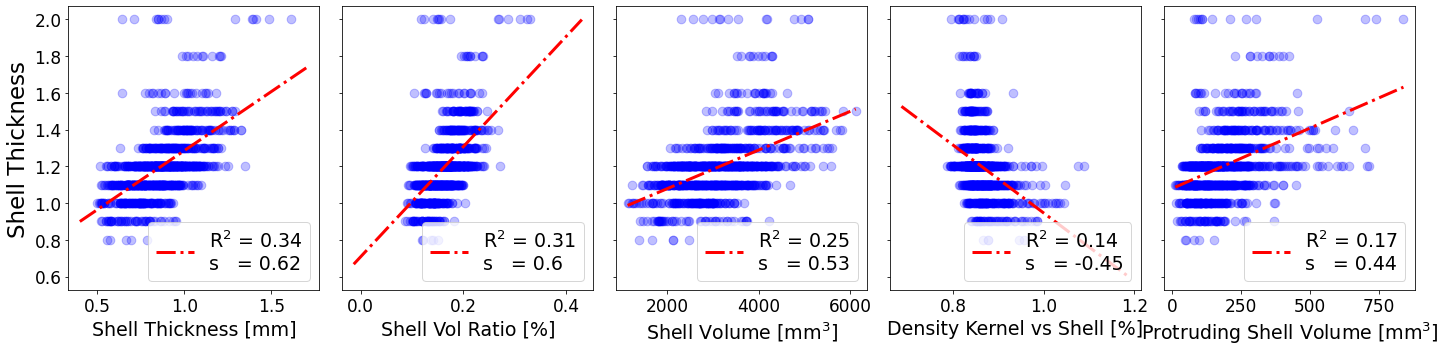

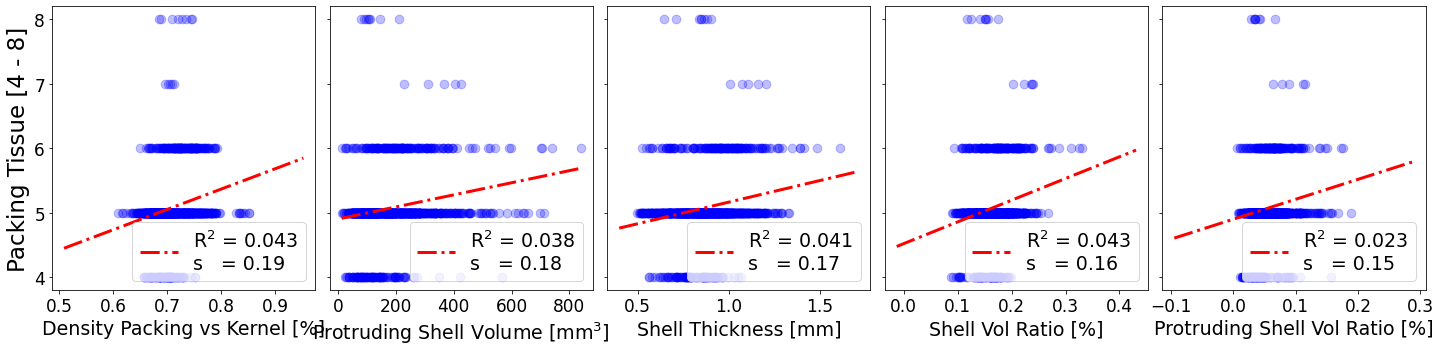

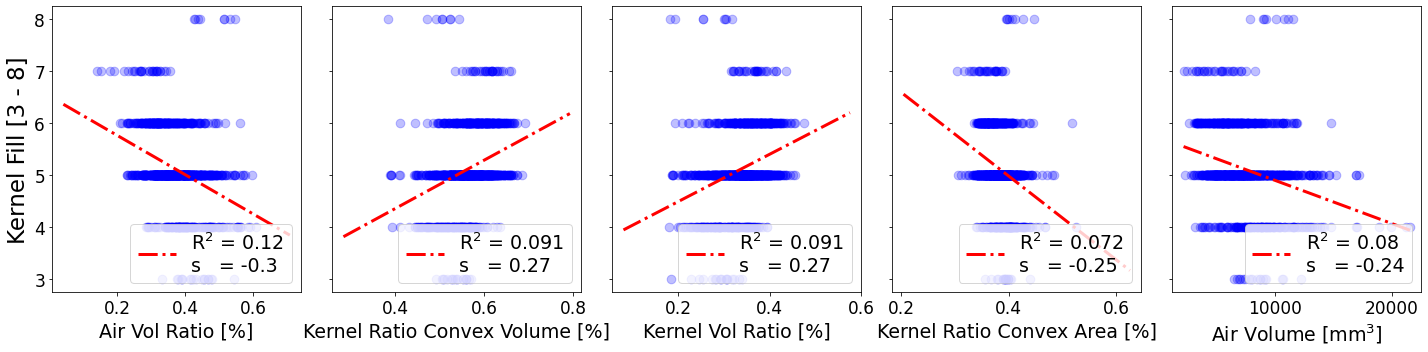

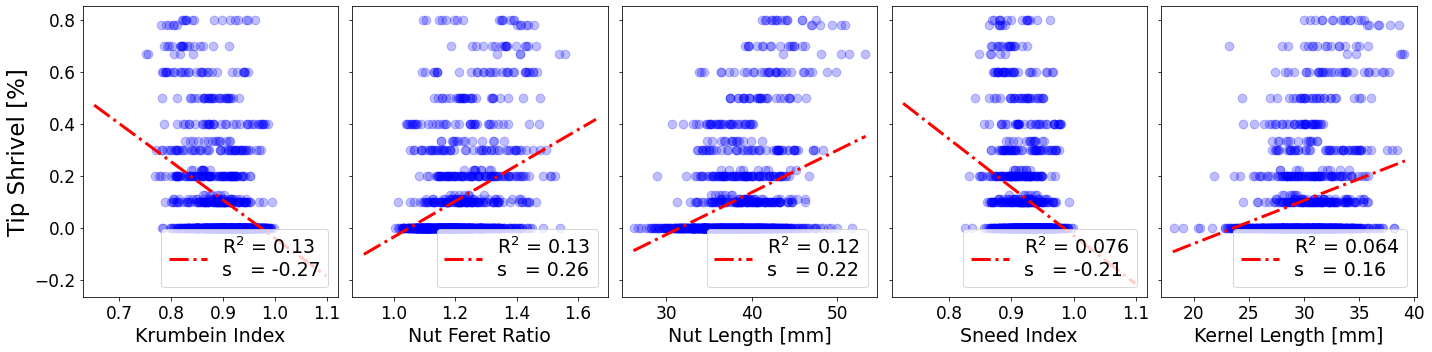

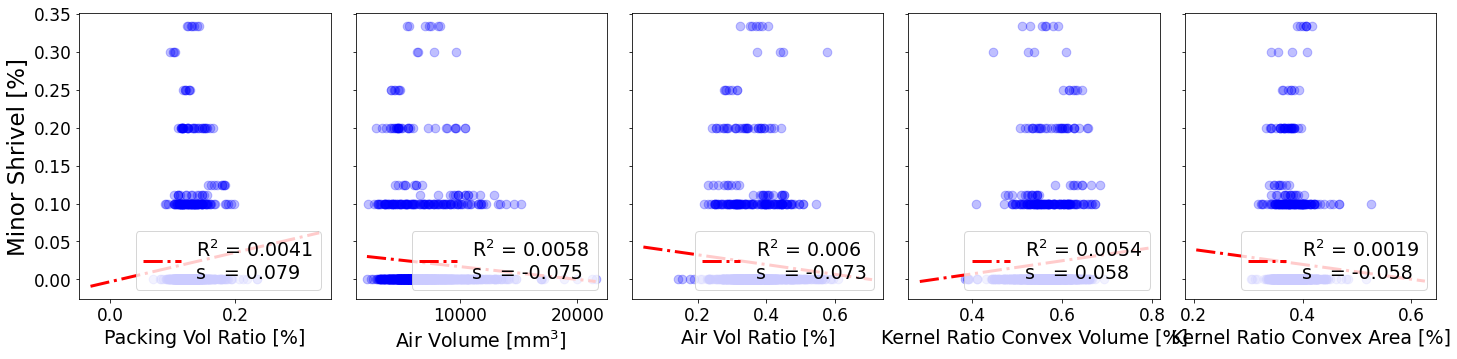

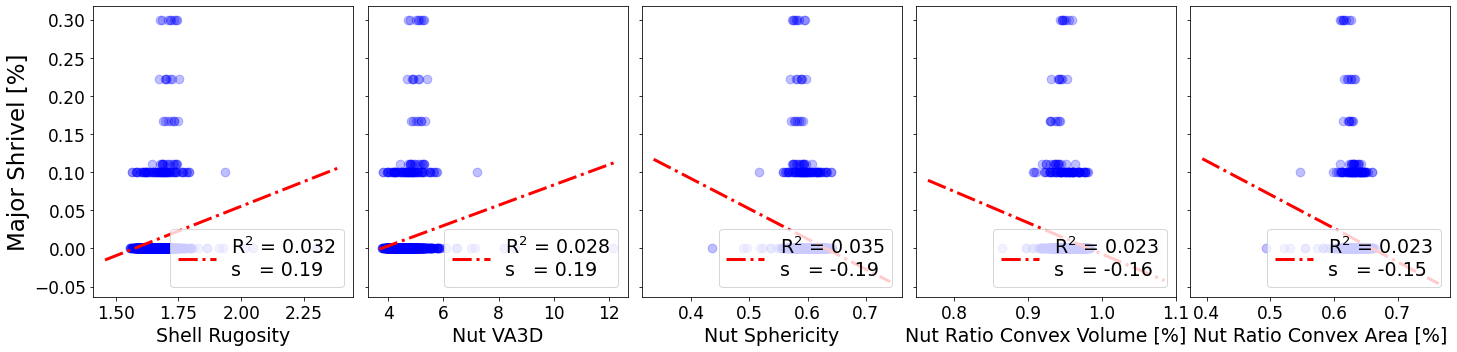

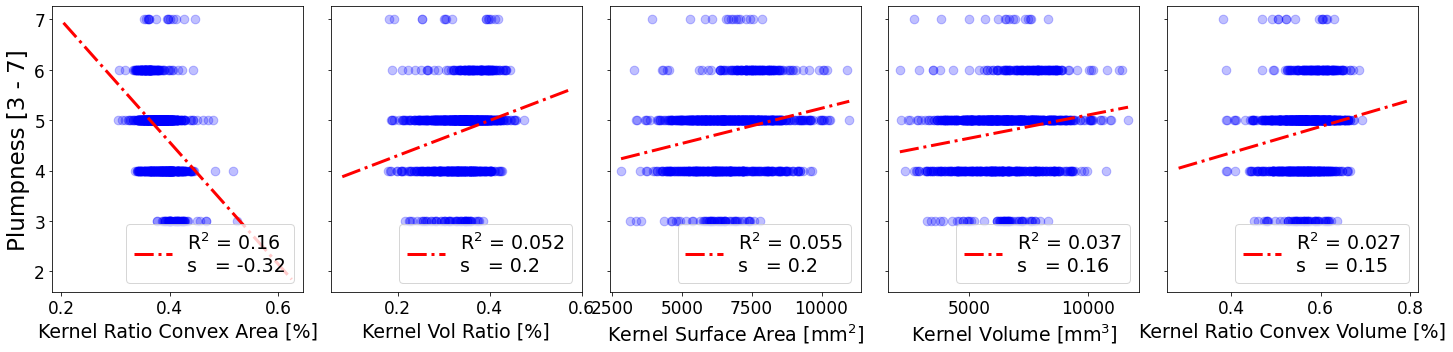

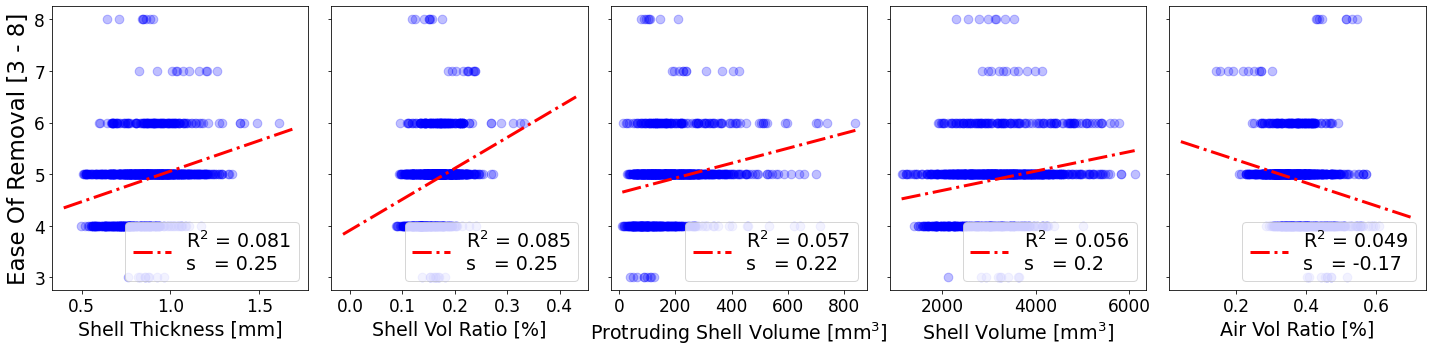

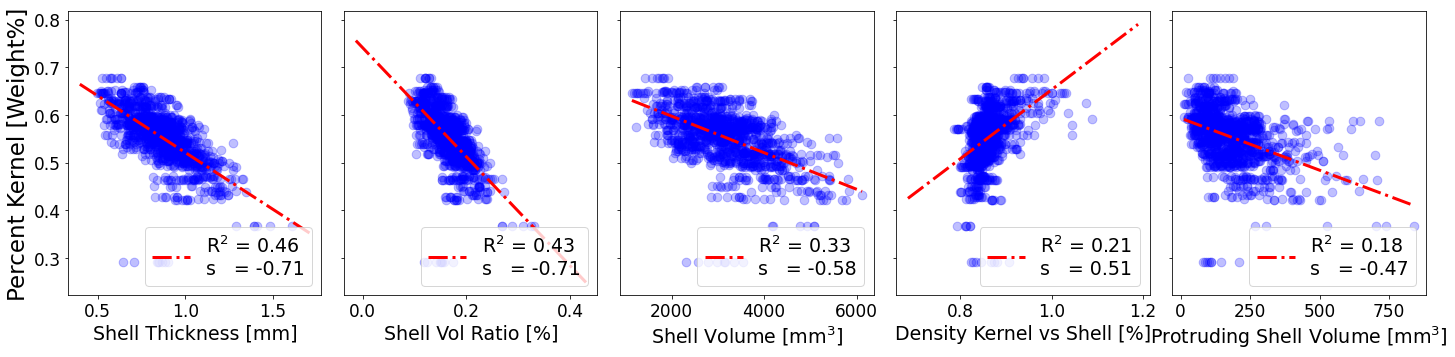

In [44]:
fs = 19
for yidx in ptraits:
    fig, ax = plt.subplots(1,5,figsize=(20,5), sharey=True)
    ax = np.atleast_1d(ax).ravel()
    y = df.iloc[:, yidx].values

    ax[0].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs+4);
    #ax[4].set_ylabel(labels.col_labels[yidx] + labels.col_units[yidx], fontsize=fs);

    for i,xidx in enumerate(np.argsort(np.abs(corr[:, yidx-len(qtraits)-offset]))[::-1][:len(ax)] + offset):
        x = df.iloc[:, xidx].values

        xrange = np.linspace(np.min(x)-0.1, np.max(x)+0.1, 100)

        s = corr[xidx - offset, yidx - len(qtraits) - offset]
        ax[i].scatter(x,y, c='b', alpha=0.25, s=75)
        ax[i].tick_params(labelsize=fs-2)

        ax[i].set_xlabel(labels.col_labels[xidx] + labels.col_units[xidx], fontsize=fs);

        new_series = P.Polynomial.fit(x,y, deg=1, full=False)
        foo = new_series.convert().coef
        r2 = r2_score(y, new_series(x))
        axlabel = 'R$^2$ = {:.2}\ns   = {:.2}'.format(r2,s)
        ax[i].plot(xrange, new_series(xrange), color='r', label=axlabel, ls='-.', lw=3)
        ax[i].legend(loc='lower right', fontsize=fs)

    fig.tight_layout()
    print(filename)
    filename = dst + 'highest_corrs_' + labels.col_labels[yidx].replace(' ', '_').lower() + '_1x5'
    plt.savefig(filename + '.jpg', dpi=200, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients


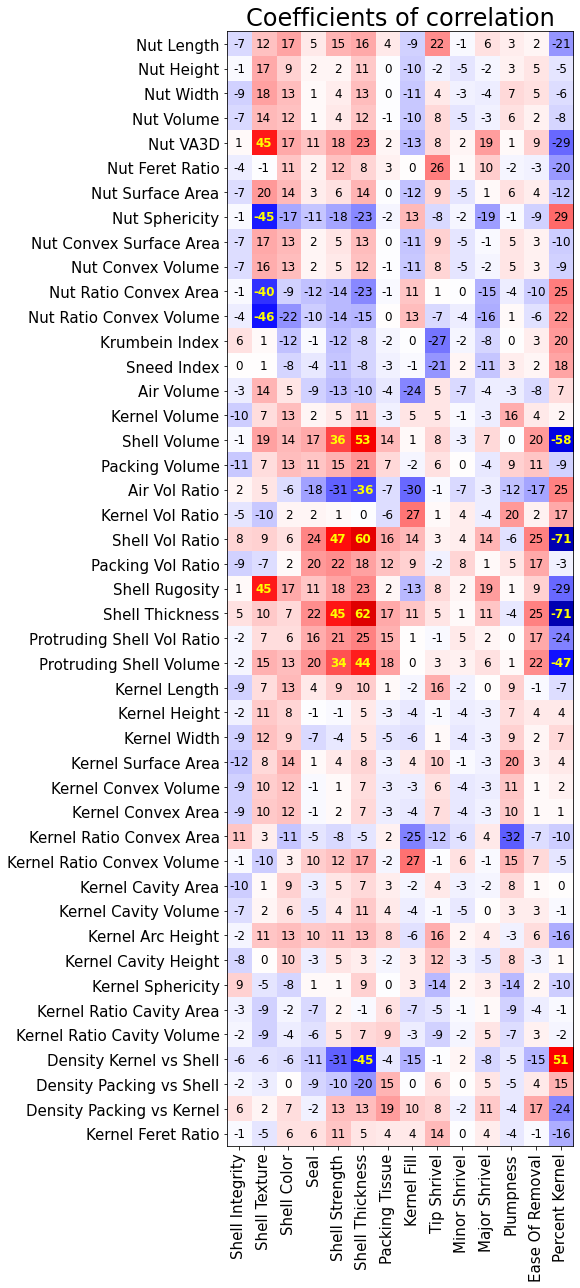

In [45]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(corr.shape[1]))
ax.set_yticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_xticklabels(labels.col_labels.iloc[ptraits])
ax.set_yticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients_h


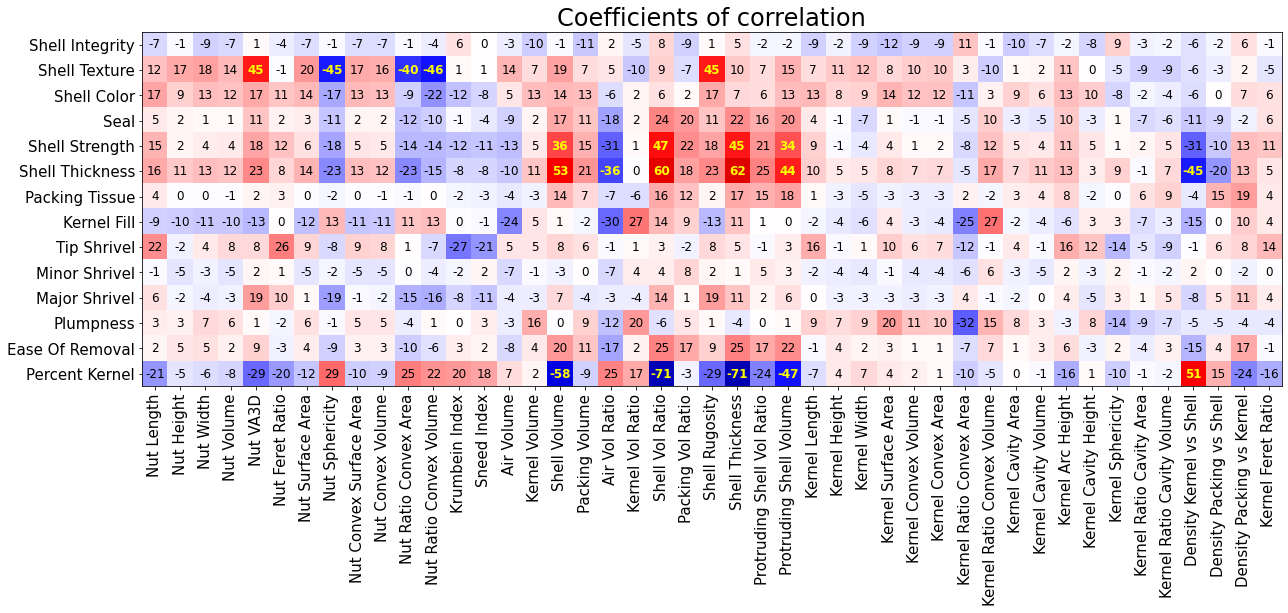

In [46]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr.T, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_yticks(np.arange(corr.shape[1]))
ax.set_xticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_yticklabels(labels.col_labels.iloc[ptraits])
ax.set_xticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(i,j, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients_h'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

In [47]:
offset = 3

qtraits = np.arange(offset,48)
ptraits = np.arange(48, len(df.columns) - 1)

kcorrstat = np.ones((len(qtraits), len(ptraits)))
kpvalcorr = np.zeros_like(kcorrstat)

scorrstat = np.ones_like(kcorrstat)
spvalcorr = np.zeros_like(kcorrstat)

feats = other.iloc[:, offset:62].values.copy()

for i in range(len(qtraits)):
    for j in range(len(ptraits)):
        kstat, kpval = stats.kendalltau(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        sstat, spval = stats.spearmanr(feats[:,qtraits[i] - offset], feats[:,ptraits[j] - offset])
        
        kcorrstat[i,j] = kstat
        kpvalcorr[i,j] = kpval
        
        scorrstat[i,j] = sstat
        spvalcorr[i,j] = spval

corr = np.zeros_like(scorrstat)
corr[:, pquant] = scorrstat[:, pquant]
corr[:, pqual]  = kcorrstat[:, pqual]

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients_minus_himalayan


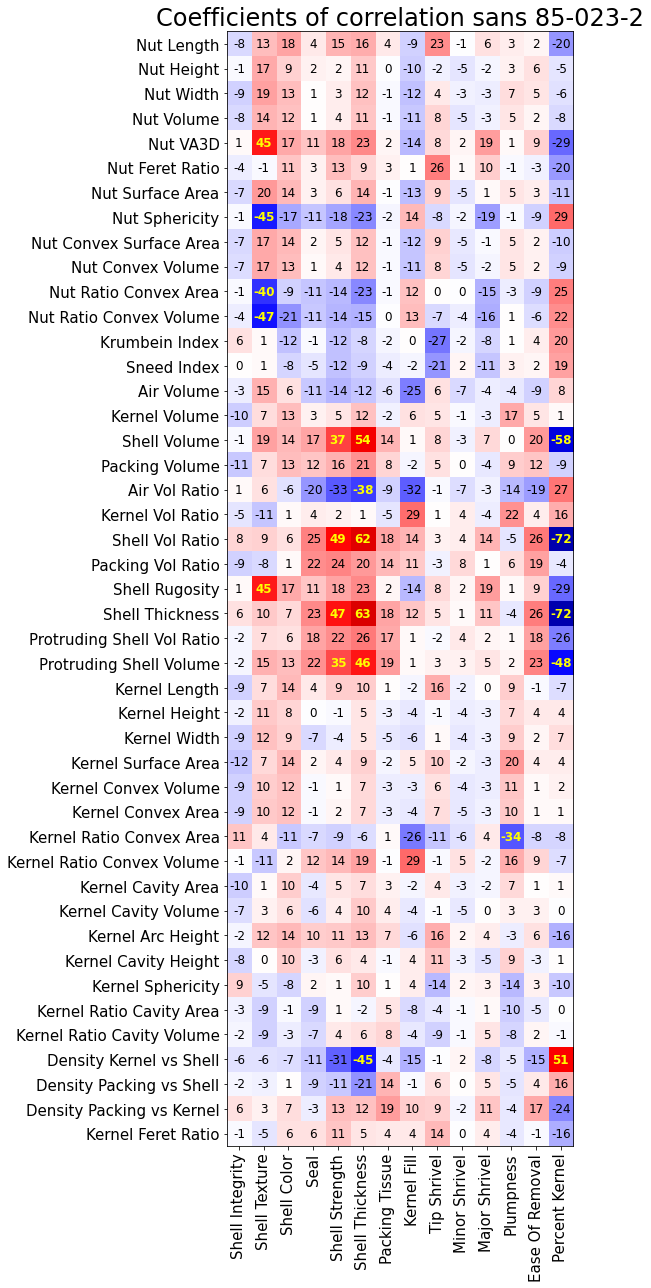

In [48]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(corr.shape[1]))
ax.set_yticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_xticklabels(labels.col_labels.iloc[ptraits])
ax.set_yticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(j, i, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation sans 85-023-2", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients_minus_himalayan'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

../hpcc/traditional/results/qual_vs_quant_correlation_coefficients_h_minus_himalayan


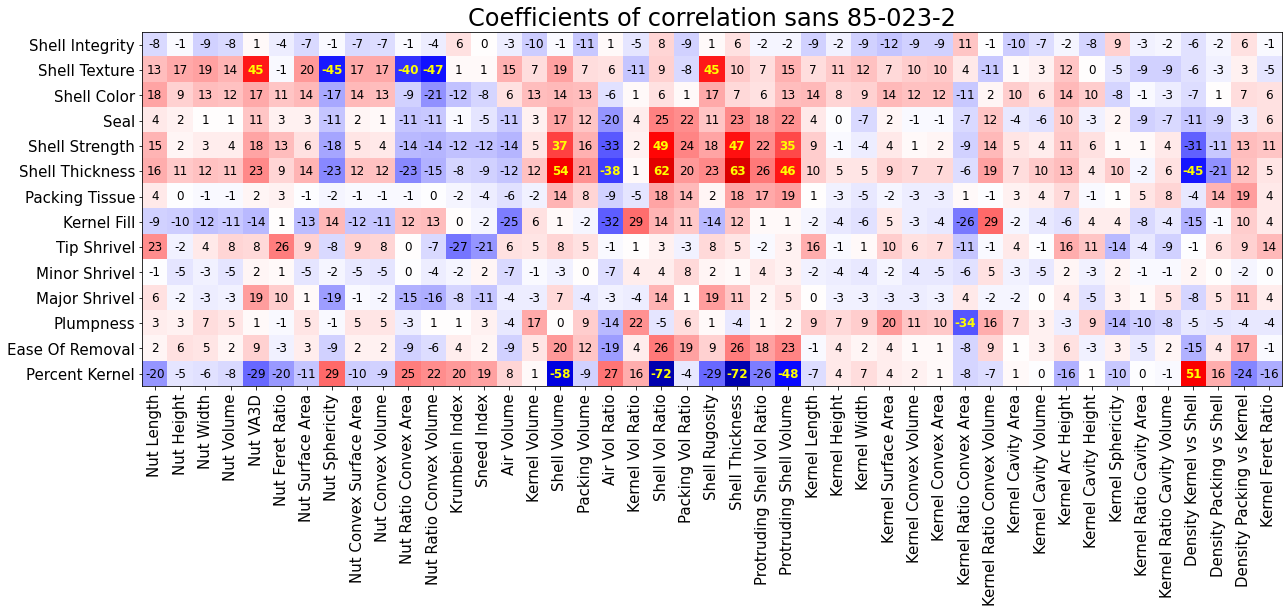

In [49]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(corr.T, cmap='seismic', vmin=-1, vmax=1)

# We want to show all ticks...
ax.set_yticks(np.arange(corr.shape[1]))
ax.set_xticks(np.arange(corr.shape[0]))
              
# ... and label them with the respective list entries
ax.set_yticklabels(labels.col_labels.iloc[ptraits])
ax.set_xticklabels(labels.col_labels.iloc[qtraits])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va ='center',
         rotation_mode="anchor")

ax.tick_params(labelsize=15)

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if np.abs(corr[i,j]) > 0.33:
            tcolor = 'yellow'
            fw = 'bold'
            fs = 14
        else:
            tcolor = 'black'
            fw = 'normal'
            fs = 12
        text = ax.text(i,j, '{:d}'.format(int(np.round(100*corr[i,j]))),
                       ha="center", va="center", color=tcolor, fontsize=12, fontweight=fw)

ax.set_title("Coefficients of correlation sans 85-023-2", fontsize=24)
#fig.colorbar(im, ax=ax, pad=0.01, shrink=0.5)
fig.tight_layout()

filename = dst + 'qual_vs_quant_correlation_coefficients_h_minus_himalayan'
print(filename)
plt.savefig(filename + '.jpg', dpi=100, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', dpi=100, format='pdf', bbox_inches='tight')

In [ ]:
interest

In [ ]:
foo = pd.DataFrame(scorrstat, columns=labels.col_labels.iloc[ptraits].values, index=labels.col_labels.iloc[qtraits].values)
foo

# Linear models

In [ ]:
fs = 22

yidx = 61
xidx = 22

x = df.iloc[:, xidx].values
y = df.iloc[:, yidx].values/100

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.scatter(x,y, c='b', alpha=0.25, s=75)
ax.set_aspect('equal', 'datalim')
ax.tick_params(labelsize=fs-5)

ax.set_xlabel(labels.col_labels[xidx], fontsize=fs);
ax.set_ylabel(labels.col_labels[yidx], fontsize=fs);



# Regression

In [ ]:
fixtrait = 27
mask = list(range(2,fixtrait)) + list(range(fixtrait,51))
X = df.iloc[:,mask].values
print(X.shape)
y = df.iloc[:,fixtrait].values
print(y.shape)

In [ ]:
alphas = np.sort(np.hstack((10**np.linspace(-4,0,5), 5*10**np.linspace(-4,-1,4))))
clf = linear.RidgeCV(alphas=alphas).fit(X,y)
clf.score(X,y)

In [ ]:
clf.alpha_